In [1]:
import sys; sys.path.append('..')
from os import path

In [2]:
from graph import Graph
from graph.reader import read_problem

In [3]:
problema = path.join('..', 'datasets', 'ORLibrary', 'steinb16.txt')

STPG = read_problem(problema)

In [4]:
assert len(STPG.terminals) == STPG.nro_terminals

STPG.nro_terminals

17

In [5]:
STPG.nro_nodes

100

In [6]:
STPG.nro_edges

200

In [7]:
print(STPG.terminals)

{97, 37, 69, 72, 9, 76, 60, 81, 82, 17, 20, 21, 54, 87, 25, 59, 28}


---

## Algoritmo Genético

In [8]:
from base.binary.combiner import crossover_1point, crossover_2points, crossover_uniform
from base.chromosome import random_binary
from base.condition import BestKnownReached, BestSolutionKnowReached, Stagnation
from base.customevol import SteinerEvolution as Evolution
from base.customevol import SteinerPopulation as Population
from base.mutate import flip_onebit
from base.normalization import normalize
from base.pickers import random_picker
from base.selector import roullete
from base.tracker import DataTracker
from base.util import display, update_best, update_generation

from treetools import Eval

In [9]:
tamanho_populacao = 10
comprimento_cromosso = STPG.nro_nodes - STPG.nro_terminals

tx_mutacao = 0.2
prob_troca_gene = 0.6

In [10]:
populacao = (Population(chromosomes=[random_binary(comprimento_cromosso) for _ in range(tamanho_populacao) ],
                        eval_function=Eval(STPG),
                        maximize=True)
                        .evaluate()
                        .callback(normalize)
                        .callback(update_best))

In [11]:
len(populacao)

10

In [12]:
evolution = (Evolution()
                .evaluate()
                .callback(normalize)
                .callback(update_best)
                .select(selection_func=roullete)
                .crossover(combiner=crossover_uniform, 
                           parent_picker=random_picker, 
                           pbcrossover=prob_troca_gene)
                .mutate(mutate_function=flip_onebit, 
                        probability=tx_mutacao)
                .callback(update_generation)
                .callback(display, every=100))

In [13]:
%%time

result = populacao.evolve(evolution, n=500)

Population 4e4cfa | size 10 | generation 100
Population 4e4cfa | size 10 | generation 200
Population 4e4cfa | size 10 | generation 300
Population 4e4cfa | size 10 | generation 400
Population 4e4cfa | size 10 | generation 500
Wall time: 8.56 s


In [14]:
result.runtime

8.561229099999998

In [15]:
result.documented_best.cost

144

In [16]:
result.documented_best.last_improvement

442

In [17]:
result.documented_best.chromosome

'00000100001000000101001101110101000101101010010101000110000000001100010001111000010'

In [18]:
assert len(result.documented_best.chromosome) == comprimento_cromosso

len(result.documented_best.chromosome)

83

---

In [19]:
individuos = sorted(result, key=lambda x: x.cost )

In [20]:
for individuo in individuos:
    print(individuo.cost)

149
150
150
150
150
150
155
156
156
161


In [21]:
type(individuos)

list

In [22]:
from treetools import Converter

converter = Converter(STPG)

In [23]:
individuos = [converter.binary2treegraph(individuo) for individuo in individuos ]

In [24]:
parent = individuos[0]

parent.chromosome.edges

defaultdict(dict,
            {6: {64: 1, 28: 1, 56: 5},
             9: {36: 5},
             12: {64: 1, 17: 10},
             17: {12: 10},
             20: {85: 2},
             21: {60: 2},
             22: {45: 5, 33: 6},
             24: {46: 1, 90: 3},
             25: {72: 1, 87: 3, 53: 5},
             26: {78: 3},
             28: {6: 1, 58: 5},
             29: {48: 1, 92: 3, 60: 7},
             30: {34: 2, 81: 8},
             32: {43: 2, 79: 2, 97: 3},
             33: {22: 6, 59: 10},
             34: {97: 1, 30: 2},
             36: {46: 1, 78: 1, 9: 5},
             37: {91: 5},
             39: {72: 1, 91: 1},
             43: {32: 2, 87: 2},
             45: {65: 2, 83: 3, 22: 5},
             46: {24: 1, 36: 1},
             48: {29: 1, 58: 1},
             50: {65: 1, 54: 3},
             52: {79: 1},
             53: {99: 1, 25: 5},
             54: {50: 3},
             56: {90: 1, 6: 5},
             58: {48: 1, 28: 5},
             59: {33: 10},
             6

In [25]:
parent.is_connected

False

In [26]:
parent.qtd_partitions

0

---

In [27]:
import networkx as nx
from matplotlib import pyplot as plt
import math

from draw import hierarchy_pos

In [28]:
def convert_graph(graph, color='black'):
    G = nx.Graph()
    for v, value in graph.items():
        G.add_node(v)
        for w, weight in value.items():
            if w in G[v]:
                continue
            G.add_edge(v, w, weight=weight, color=color)
    return G    

In [29]:
def plotar_(individuo, raiz):
    
    grafo = convert_graph(individuo.chromosome.edges)
    
    
    pos = hierarchy_pos(grafo, root=raiz, width = 2*math.pi, xcenter=0)
    
    pos_t = {u: (r * math.cos(theta), r * math.sin(theta)) for u, (theta, r) in pos.items()}
    
    nx.draw(grafo,
        pos_t,
        node_color='#A0CBE2',
        edge_color='black',
        width=2, 
        node_size=100,
        with_labels=True)

    nx.draw_networkx_nodes(grafo,
                           pos=pos_t,
                           nodelist = STPG.terminals,
                           node_color = 'red', 
                           node_size = 150)

    plt.show()

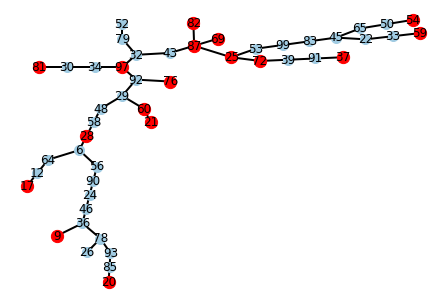

In [30]:
plotar_(individuos[0], 97)

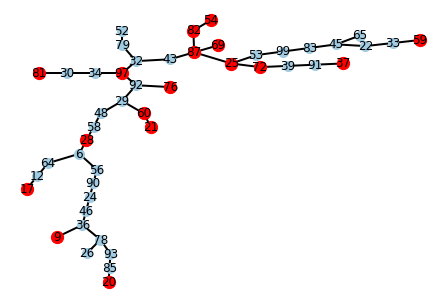

In [31]:
plotar_(individuos[1], 97)